In [ ]:
!pip install elevation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!eio clip -o Jejudo-30m-DEM.tif --bounds 126.10 33.15 127.00 33.58

make: Entering directory '/root/.cache/elevation/SRTM1'
curl -s -o spool/N33/N33E126.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N33/N33E126.hgt.gz && mv spool/N33/N33E126.hgt.gz.temp spool/N33/N33E126.hgt.gz
gunzip spool/N33/N33E126.hgt.gz 2>/dev/null || touch spool/N33/N33E126.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N33/N33E126.hgt cache/N33/N33E126.tif 2>/dev/null || touch cache/N33/N33E126.tif
rm spool/N33/N33E126.hgt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
gdalbuildvrt -q -overwrite SRTM1.vrt cache/N33/N33E126.tif
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.3bba044cc44d4d9cb73d291f14f0d839.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.3 MB/s 


In [ ]:
import rasterio as rio

In [ ]:
import pandas as pd

In [ ]:
import xarray as xr

In [ ]:
da = xr.open_rasterio("Jejudo-30m-DEM.tif") 

<ipython-input-7-f9c0e5b2a9d9>:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  da = xr.open_rasterio("Jejudo-30m-DEM.tif")


In [ ]:
type(da)

xarray.core.dataarray.DataArray

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

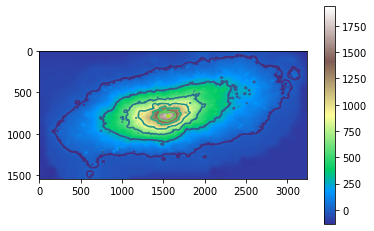

In [ ]:
cp = plt.imshow(da[0,:,:],cmap='terrain')
plt.contour(da[0,:,:])
plt.colorbar(cp)

In [ ]:
ny, nx = len(da['y']), len(da['x'])

In [ ]:
import numpy as np

In [ ]:
x,y = np.meshgrid(da['x'],da['y'])

In [ ]:
val = da.to_dataset('band')

In [ ]:
from rasterio.warp import transform

In [ ]:
# Rasterio works with 1D arrays
lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
lon = np.asarray(lon).reshape((ny, nx))
lat = np.asarray(lat).reshape((ny, nx))
da.coords['lon'] = (('y', 'x'), lon)
da.coords['lat'] = (('y', 'x'), lat)

In [ ]:
da.coords

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 33.58 33.58 33.58 33.58 ... 33.15 33.15 33.15 33.15
  * x        (x) float64 126.1 126.1 126.1 126.1 ... 127.0 127.0 127.0 127.0
    lon      (y, x) float64 126.1 126.1 126.1 126.1 ... 127.0 127.0 127.0 127.0
    lat      (y, x) float64 33.58 33.58 33.58 33.58 ... 33.15 33.15 33.15 33.15

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(18,16)
cp = plt.pcolor(lon,lat,val,cmap="terrain")
plt.contour(lon,lat,val)
plt.colorbar(cp)

TypeError: ignored